In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pokemon_data = pd.read_csv('pokemonData.csv')
pokemon_data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Tier
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,LC
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,NFE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped,UU
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,LC
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,NFE


In [2]:
pokemon_data_train = pokemon_data[:500]
pokemon_data_test = pokemon_data[500:]

train_length = len(pokemon_data_train)
test_length = len(pokemon_data_test)

# A pokemon's competitive tier and what we will be predicting
tier_target_train = pokemon_data_train['Tier']
tier_target_test = pokemon_data_test['Tier']

# A pokemon's stat total and the feature most likely related to competitive tier
total_train = pokemon_data_train['Total']
total_test = pokemon_data_test['Total']

# A boolean value saying whether a pokemon is a legendary
# Legendary pokemon tend to have higher stat totals
legendary_train = pokemon_data_train['isLegendary']
legendary_test = pokemon_data_test['isLegendary']

# A boolean value saying whether the pokemon has a mega evolution
# Mega evolution adds a flat 100 to the stat total
mega_train = pokemon_data_train['hasMegaEvolution']
mega_test = pokemon_data_test['hasMegaEvolution']

# Pokemon type
type_1_train = pokemon_data_train["Type_1"]
type_2_train = pokemon_data_train["Type_2"]

type_1_test = pokemon_data_test["Type_1"]
type_2_test = pokemon_data_test["Type_2"]

In [3]:
def assign_type(array):
    type_arr = []
    for poke_type in array:
        if poke_type == "Grass":
            type_arr.append(1)
        elif poke_type == "Fire":
            type_arr.append(2)
        elif poke_type == "Water":
            type_arr.append(3)
        elif poke_type == "Electric":
            type_arr.append(4)
        elif poke_type == "Ground":
            type_arr.append(5)
        elif poke_type == "Rock":
            type_arr.append(6)
        elif poke_type == "Steel":
            type_arr.append(7)
        elif poke_type == "Fairy":
            type_arr.append(8)
        elif poke_type == "Dragon":
            type_arr.append(9)
        elif poke_type == "Ghost":
            type_arr.append(10)
        elif poke_type == "Dark":
            type_arr.append(11)
        elif poke_type == "Psychic":
            type_arr.append(12)
        elif poke_type == "Poison":
            type_arr.append(13)
        elif poke_type == "Ice":
            type_arr.append(14)
        elif poke_type == "Fighting":
            type_arr.append(15)
        elif poke_type == "Normal":
            type_arr.append(16)
        elif poke_type == "Flying":
            type_arr.append(17)
        elif poke_type == "Bug":
            type_arr.append(18)
        else:
            type_arr.append(0)
    return type_arr

In [4]:
# Put all the individual features in one feature array
training_set = np.empty((train_length,5))
testing_set = np.empty((test_length,5))

type_1_train_numarr =  np.asarray(assign_type(type_1_train))
type_1_test_numarr =  np.asarray(assign_type(type_1_test))

type_2_train_numarr =  np.asarray(assign_type(type_2_train))
type_2_test_numarr =  np.asarray(assign_type(type_2_test))

i = 0
while i < train_length:
    training_set[i] = [type_1_train_numarr[i], type_2_train_numarr[i], total_train[i], legendary_train[i], mega_train[i]]
    i += 1
while i < train_length+test_length:
    testing_set[i-train_length] =  [type_1_test_numarr[i - 500], type_2_test_numarr[i - 500], total_test[i], legendary_test[i], mega_test[i]]
    i += 1
testing_set[0]

array([  3.,   0., 308.,   0.,   0.])

In [5]:
from sklearn.preprocessing import Normalizer
def normalize(X):
    data = X
    transformer = Normalizer().fit_transform(data) # fit does nothing.
    return transformer

In [6]:
# Predict with Logistic Regression(LR)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(training_set, tier_target_train)
test_pred = lr.predict(testing_set)
predict_arr = lr.predict_log_proba(testing_set) 
score = lr.score(testing_set, tier_target_test)
print("The accuracy rate is %4.2f" % (score*100))
print(training_set)

The accuracy rate is 56.11
[[  1.  13. 318.   0.   0.]
 [  1.  13. 405.   0.   0.]
 [  1.  13. 525.   0.   1.]
 ...
 [  2.   0. 308.   0.   0.]
 [  2.  15. 418.   0.   0.]
 [  2.  15. 528.   0.   0.]]


In [7]:
# Predict use LR with Normalizer
lr_normal_train = normalize(training_set)
lr_normal_test = normalize(testing_set)

lr_normal = LogisticRegression().fit(lr_normal_train, tier_target_train)
normal_test_pred = lr_normal.predict(lr_normal_test)
normal_predict_arr = lr_normal.predict_log_proba(lr_normal_test) 
score_normal = lr_normal.score(lr_normal_test, tier_target_test)
print("The accuracy rate is %4.2f" % (score_normal*100))
lr_normal_train

The accuracy rate is 34.84


array([[0.00314201, 0.04084618, 0.99916051, 0.        , 0.        ],
       [0.00246786, 0.03208214, 0.99948219, 0.        , 0.        ],
       [0.00190417, 0.02475423, 0.99968994, 0.        , 0.00190417],
       ...,
       [0.00649337, 0.        , 0.99997892, 0.        , 0.        ],
       [0.00478156, 0.03586167, 0.99934532, 0.        , 0.        ],
       [0.00378632, 0.02839743, 0.99958954, 0.        , 0.        ]])

In [8]:
# Confusion matrix for normalized and unnormalized LR 
from sklearn.metrics import confusion_matrix
type_list =['Uber', 'OU', 'UU', 'NU', 'RU', 'PU', 'LC', 'NFE']

lr_matrix = confusion_matrix(tier_target_test, test_pred, labels=['Uber', 'OU', 'UU', 'NU', 'RU', 'PU', 'LC', 'NFE'])
normal_lr_matrix = confusion_matrix(tier_target_test, normal_test_pred, labels=['Uber', 'OU', 'UU', 'NU', 'RU', 'PU', 'LC', 'NFE'])
print("     The Confusion Matrix without Normalizer")
print("       Uber  OU  UU  NU   RU   PU   LC   NFE")

print(lr_matrix)
    
print("     The Confusion Matrix with Normalizer")
print("       Uber  OU  UU  NU   RU   PU   LC   NFE")

print(normal_lr_matrix)

# for n in type_list:
#     line = ""
#     for m in type_list:
#         line += "    "+str(lr_normal_matrix[n][m])
#     print (n+line)

     The Confusion Matrix without Normalizer
       Uber  OU  UU  NU   RU   PU   LC   NFE
[[ 2  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 5  0  0  0  0 13  0  0]
 [ 0  0  0  0  1 21  1  0]
 [ 1  0  0  0  0 17  0  0]
 [ 0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  7 16  0]]
     The Confusion Matrix with Normalizer
       Uber  OU  UU  NU   RU   PU   LC   NFE
[[ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0 23  0]]


Classify the tiers using Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

def gnb(X_train, Y_train, X_test, Y_test):
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    print("The accuracy is %4.2f%%" % (clf.score(X_test, Y_test) * 100))
    
Y_train = tier_target_train
Y_test = tier_target_test

X_train = np.array(total_train).reshape(-1, 1)
X_test = np.array(total_test).reshape(-1, 1)

gnb(X_train, Y_train, X_test, Y_test)
gnb(training_set, Y_train, testing_set, Y_test)

gnb(normalize(training_set), Y_train, normalize(testing_set), Y_test)

The accuracy is 57.92%
The accuracy is 41.18%
The accuracy is 38.01%


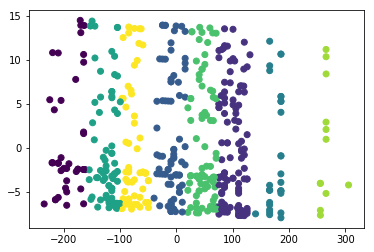

In [11]:
# Use K-mean clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=8, random_state=0)
tier_fit = kmeans.fit(training_set)
tier_graph = kmeans.fit_predict(training_set)
tier_graph.shape

pca = PCA(n_components=2)
pca_data = pca.fit_transform(training_set)
pca_data[:,0]
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=tier_graph)

In [10]:
from sklearn.svm import SVC

def svm(X_train, Y_train, X_test, Y_test, des):
    svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
    svc.fit(X_train, Y_train)
    print('The accuracy for ' + des + ', %4.2f%%\n\n'% (svc.score(X_test, Y_test) * 100))
    
svm(X_train, Y_train, X_test, Y_test, "total stats only")
svm(training_set, Y_train, testing_set, Y_test, 'all features')
svm(normalize(training_set), Y_train, normalize(testing_set), Y_test, 'all feature normalized')

The accuracy for total stats only, 52.49%


The accuracy for all features, 44.80%


The accuracy for all feature normalized, 34.84%


